### Constrained clustering with noisy constraints

In this example, we add some constraint noise to the problem, which simulates an imperfect oracle. Any constrained clustering method must account for errors in the constraint set, especially with the prominence of crowdsourced solutions for annotation.

There has been almost no coverage of dealing with imperfect oracles in the literature. Aside from this work, only "Constrained clustering with imperfect oracles" [Zhu 2015] exists. As opposed with the method of Zhu, our ImperfectOracles tool very explicitly detects constraints which interfere with fellow constraints, and automatically determines the number of constraints that should be removed. Thus, it is appropriate to apply even to perfect constraint sets.

The ImperfectOracles tool functions by creating an ensemble of reasonable clusterings of the data. Constraints which are mutually satisfied are said to vote for one another. Constraints present in the same clusters are said to be relevant. A measure called "trust" is the fraction of the relevant, trusted vote that a constraint gets from its peers. The trust is calculated with a fixed point update based on this recursive definition.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds

from robustclust import get_constraints, \
                        plot_constraints, \
                        remove_constraints

First, make some data and make some constraints. We can add random constraint errors by flipping some constraint values (ML to CL, CL to ML).

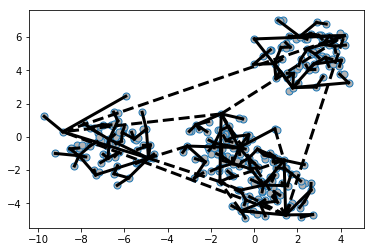

In [2]:
N, n_clusters, n_constraints, err_rate = (300, 4, 200, 0.0)

data, labels = ds.make_blobs(n_samples=N, n_features=2, centers=n_clusters)

constraint_mat, _ = get_constraints(
    data,
    labels,
    method='mmffqs',
    n_constraints=n_constraints,
    err_rate=err_rate)

plot_constraints(data, constraint_mat=constraint_mat)

Remove errant constraints

In [14]:
keep_idx = remove_constraints(data, constraint_mat, n_clusters=n_clusters, threshold=0.999)
print(constraint_mat.shape)
print(np.mean(keep_idx))

/home/evan/anaconda3/lib/python3.6/site-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


(200, 3)
0.905


/home/evan/robust-clust/robustclust/robust.py:79: RuntimeWarning: invalid value encountered in true_divide
  trustedness = received_trust_votes / possible_trust_votes


The results are not very good, we need to clean the constraint set. Use the ImperfectOracle class.

In [4]:
io = IO(data=data,
        constraintMat=constraintMat,
        n_clusters=Nclusters)
keepInd = io.remove_constraints()

plt.figure()
io.plot_removal(labels, keepInd)
plt.tight_layout()
plt.show()

NameError: name 'IO' is not defined

After cleaning the constraint set, let's try turning constraints to labels again.

In [ ]:
newConstraintMat = constraintMat[keepInd,:]

ctl2 = CTL(data=data,
          constraintMat=newConstraintMat,
          n_clusters=Nclusters)
ctl2.fit_constrained()


plt.figure()
cc.plot_labels(data)
cc.plot_labels(data[ctl2.constrainedSamps], ctl2.labelSet)
plt.show()


We now have turned the noisy constraint set into a very useful set of labels, with no additional information.